In [55]:
import pandas as pd
import json

# Загрузка данных
sleep_expanded_df = pd.read_csv('D:\\Downloads\\ah_sleep.csv')
step_expanded_df = pd.read_csv('D:\\Downloads\\ah_step.csv')  

# Преобразуем временные метки в datetime
sleep_expanded_df['timestamp'] = pd.to_datetime(sleep_expanded_df['timestamp'], unit='s', errors='coerce')
step_expanded_df['timestamp'] = pd.to_datetime(step_expanded_df['timestamp'], unit='s', errors='coerce')

# Упорядочим данные по времени
sleep_expanded_df = sleep_expanded_df.sort_values(by='timestamp')
step_expanded_df = step_expanded_df.sort_values(by='timestamp')

# Рассчитываем продолжительность сна и прогулки (расчет разницы между текущим и предыдущим временем)
sleep_expanded_df['sleep_duration'] = (sleep_expanded_df['timestamp'].diff()).dt.total_seconds() / 3600
step_expanded_df['walk_duration'] = (step_expanded_df['timestamp'].diff()).dt.total_seconds() / 3600

# Удалим строки с отрицательной продолжительностью (если есть)
sleep_expanded_df = sleep_expanded_df[sleep_expanded_df['sleep_duration'] > 0]
step_expanded_df = step_expanded_df[step_expanded_df['walk_duration'] > 0]

# Удалим строки с пропущенными значениями
sleep_expanded_df = sleep_expanded_df.dropna(subset=['sleep_duration'])
step_expanded_df = step_expanded_df.dropna(subset=['walk_duration'])

# Проверим на наличие NaT (невалидные значения) после очистки
print("Строки с NaT в данных о сне после очистки:")
print(sleep_expanded_df[sleep_expanded_df['timestamp'].isna()])
print("Строки с NaT в данных о шагах после очистки:")
print(step_expanded_df[step_expanded_df['timestamp'].isna()])

# Объединяем данные по 'user_id'
merged_df = pd.merge(sleep_expanded_df, step_expanded_df, on='user_id', suffixes=('_sleep', '_steps'))

# Проверяем первые строки объединенного датафрейма
print("Объединенные данные:")
print(merged_df[['user_id', 'sleep_duration', 'walk_duration']].head())

# Анализируем корреляцию между длительностью сна и прогулок
correlation = merged_df[['sleep_duration', 'walk_duration']].corr()
print("Корреляция между длительностью сна и прогулок:")
print(correlation)


Строки с NaT в данных о сне после очистки:
Empty DataFrame
Columns: [id, timestamp, data_version, data_type, data, provider, user_id, sleep_duration]
Index: []
Строки с NaT в данных о шагах после очистки:
Empty DataFrame
Columns: [id, timestamp, data_version, data_type, data, provider, user_id, walk_duration]
Index: []
Объединенные данные:
   user_id  sleep_duration  walk_duration
0  2261472       25.888889      25.934444
1  2261472       25.888889      26.621667
2  2261472       25.888889     116.495278
3  2261472       25.888889      20.591389
4  2261472       25.888889      25.576389
Корреляция между длительностью сна и прогулок:
                sleep_duration  walk_duration
sleep_duration    1.000000e+00  -4.022695e-16
walk_duration    -4.022695e-16   1.000000e+00


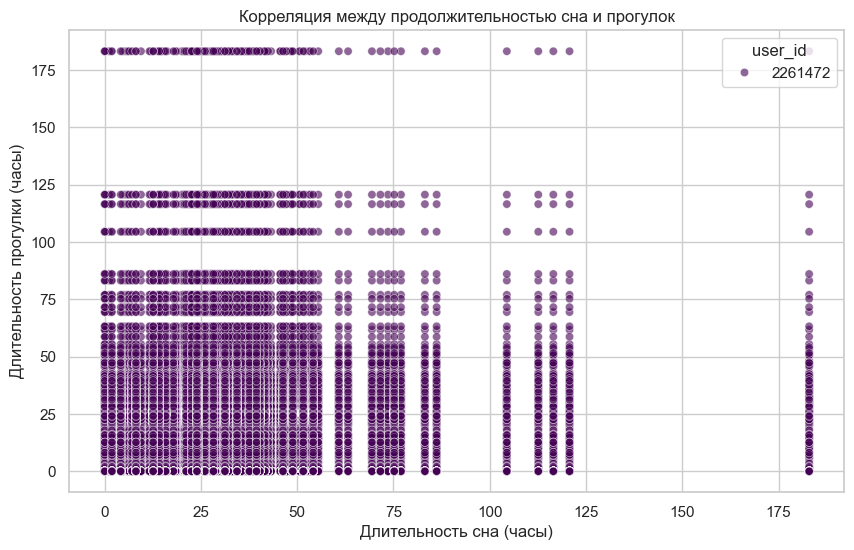

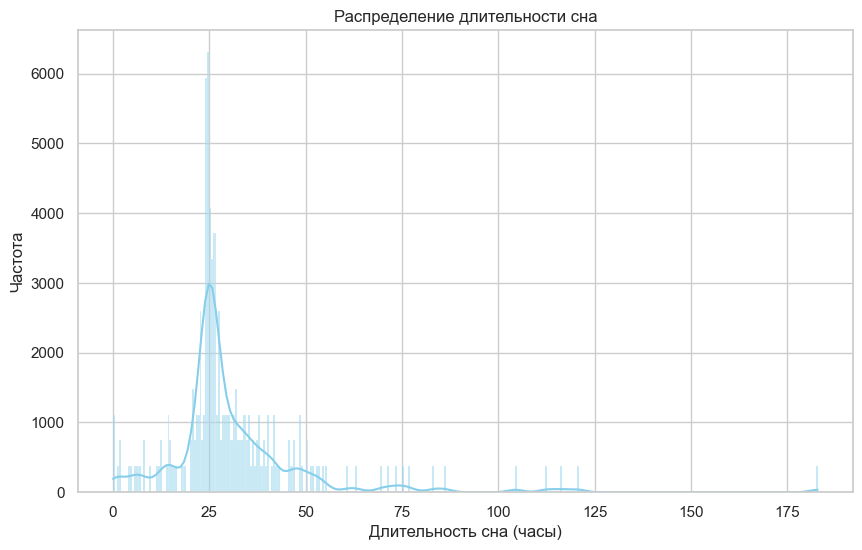

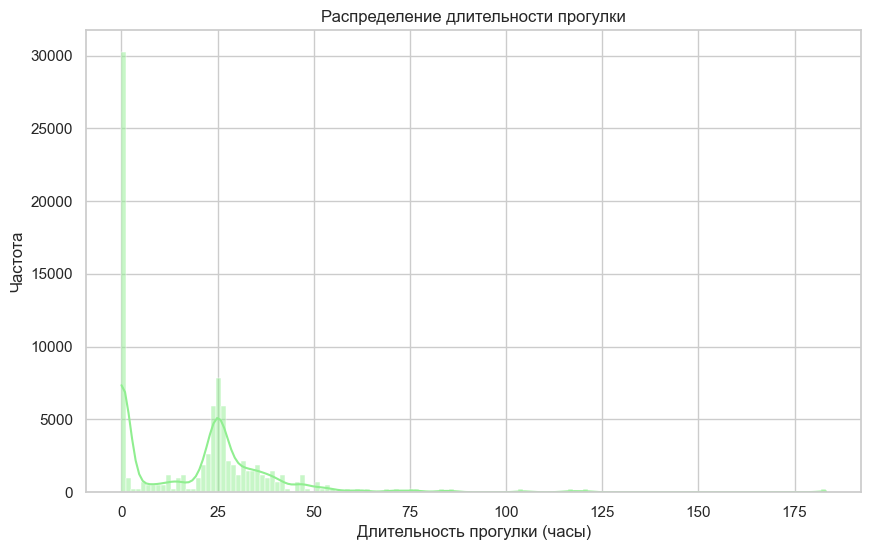

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стиль графиков
sns.set(style="whitegrid")

# 1. Диаграмма рассеяния для сна и прогулок
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='sleep_duration', y='walk_duration', hue='user_id', palette='viridis', alpha=0.6)
plt.title('Корреляция между продолжительностью сна и прогулок')
plt.xlabel('Длительность сна (часы)')
plt.ylabel('Длительность прогулки (часы)')
plt.show()

# 2. Гистограмма для длительности сна
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['sleep_duration'], kde=True, color='skyblue')
plt.title('Распределение длительности сна')
plt.xlabel('Длительность сна (часы)')
plt.ylabel('Частота')
plt.show()

# 3. Гистограмма для длительности прогулки
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['walk_duration'], kde=True, color='lightgreen')
plt.title('Распределение длительности прогулки')
plt.xlabel('Длительность прогулки (часы)')
plt.ylabel('Частота')
plt.show()


In [57]:
# Проверка на отрицательные значения и выбросы
print("Минимальные значения продолжительности сна:", merged_df['sleep_duration'].min())
print("Максимальные значения продолжительности сна:", merged_df['sleep_duration'].max())

print("Минимальные значения продолжительности прогулки:", merged_df['walk_duration'].min())
print("Максимальные значения продолжительности прогулки:", merged_df['walk_duration'].max())

# Убираем аномальные значения (например, если значения превышают 24 часа)
merged_df = merged_df[(merged_df['sleep_duration'] > 0) & (merged_df['sleep_duration'] <= 24)]
merged_df = merged_df[(merged_df['walk_duration'] > 0) & (merged_df['walk_duration'] <= 24)]

# Проверим обновленные данные
print("Обновленные данные:")
print(merged_df.head())


Минимальные значения продолжительности сна: 0.008888888888888889
Максимальные значения продолжительности сна: 182.92916666666667
Минимальные значения продолжительности прогулки: 0.0002777777777777778
Максимальные значения продолжительности прогулки: 183.16694444444445
Обновленные данные:
                                               id_sleep     timestamp_sleep  \
1116  applehealth_sleep_2261472_83dd8ed4ec44b3a49d8e... 2024-01-09 09:04:55   
1121  applehealth_sleep_2261472_83dd8ed4ec44b3a49d8e... 2024-01-09 09:04:55   
1126  applehealth_sleep_2261472_83dd8ed4ec44b3a49d8e... 2024-01-09 09:04:55   
1128  applehealth_sleep_2261472_83dd8ed4ec44b3a49d8e... 2024-01-09 09:04:55   
1129  applehealth_sleep_2261472_83dd8ed4ec44b3a49d8e... 2024-01-09 09:04:55   

      data_version_sleep    data_type_sleep  \
1116                   2  applehealth_sleep   
1121                   2  applehealth_sleep   
1126                   2  applehealth_sleep   
1128                   2  applehealth_sleep   
1

In [59]:
# Убираем значения, превышающие 24 часа
merged_df = merged_df[(merged_df['sleep_duration'] <= 24)]
merged_df = merged_df[(merged_df['walk_duration'] <= 24)]

# Проверим обновленные данные
print("Обновленные данные:")
print(merged_df.head())


Обновленные данные:
                                               id_sleep     timestamp_sleep  \
1116  applehealth_sleep_2261472_83dd8ed4ec44b3a49d8e... 2024-01-09 09:04:55   
1121  applehealth_sleep_2261472_83dd8ed4ec44b3a49d8e... 2024-01-09 09:04:55   
1126  applehealth_sleep_2261472_83dd8ed4ec44b3a49d8e... 2024-01-09 09:04:55   
1128  applehealth_sleep_2261472_83dd8ed4ec44b3a49d8e... 2024-01-09 09:04:55   
1129  applehealth_sleep_2261472_83dd8ed4ec44b3a49d8e... 2024-01-09 09:04:55   

      data_version_sleep    data_type_sleep  \
1116                   2  applehealth_sleep   
1121                   2  applehealth_sleep   
1126                   2  applehealth_sleep   
1128                   2  applehealth_sleep   
1129                   2  applehealth_sleep   

                                             data_sleep provider_sleep  \
1116  [{"dataType":"category","entryType":"sleep","h...    applehealth   
1121  [{"dataType":"category","entryType":"sleep","h...    applehealth   


Коэффициент наклона: [6.18114834e-18]
Свободный член (перехват): 15.518539272030651


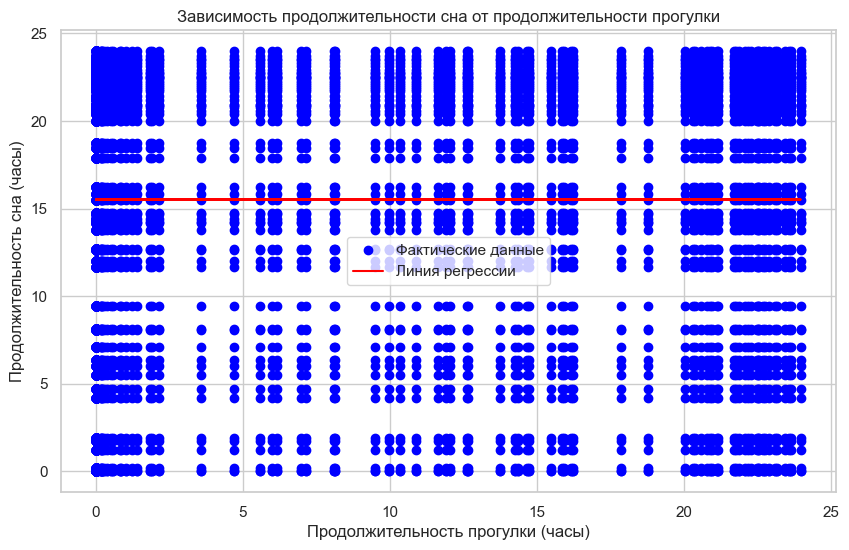

In [60]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Подготовка данных
X = merged_df[['walk_duration']]  # Прогулки
y = merged_df['sleep_duration']   # Сон

# Создание и обучение модели
model = LinearRegression()
model.fit(X, y)

# Предсказания
y_pred = model.predict(X)

# Вывод коэффициентов модели
print("Коэффициент наклона:", model.coef_)
print("Свободный член (перехват):", model.intercept_)

# Визуализация
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Фактические данные')
plt.plot(X, y_pred, color='red', label='Линия регрессии')
plt.xlabel('Продолжительность прогулки (часы)')
plt.ylabel('Продолжительность сна (часы)')
plt.title('Зависимость продолжительности сна от продолжительности прогулки')
plt.legend()
plt.show()


In [61]:
# Функция для определения сезона по месяцу
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Применим функцию для определения сезона
merged_df['season_sleep'] = merged_df['timestamp_sleep'].dt.month.apply(get_season)
merged_df['season_steps'] = merged_df['timestamp_steps'].dt.month.apply(get_season)

# Посмотрим на обновленные данные
print(merged_df[['timestamp_sleep', 'season_sleep', 'timestamp_steps', 'season_steps']].head())


         timestamp_sleep season_sleep     timestamp_steps season_steps
1116 2024-01-09 09:04:55       Winter 2024-01-09 09:04:18       Winter
1121 2024-01-09 09:04:55       Winter 2024-01-14 19:33:13       Winter
1126 2024-01-09 09:04:55       Winter 2024-02-01 05:51:00       Winter
1128 2024-01-09 09:04:55       Winter 2024-02-02 19:18:33       Winter
1129 2024-01-09 09:04:55       Winter 2024-02-03 05:39:54       Winter


In [62]:
# Анализ продолжительности сна по сезонам
sleep_by_season = merged_df.groupby('season_sleep')['sleep_duration'].mean()

# Анализ продолжительности прогулок по сезонам
walk_by_season = merged_df.groupby('season_steps')['walk_duration'].mean()

# Выводим результаты
print("Средняя продолжительность сна по сезонам:")
print(sleep_by_season)

print("\nСредняя продолжительность прогулок по сезонам:")
print(walk_by_season)


Средняя продолжительность сна по сезонам:
season_sleep
Fall      15.163284
Spring    15.346508
Summer    15.665033
Winter    16.114278
Name: sleep_duration, dtype: float64

Средняя продолжительность прогулок по сезонам:
season_steps
Fall       2.069524
Spring    11.521096
Summer     8.276034
Winter    12.970167
Name: walk_duration, dtype: float64


In [63]:
# Группировка данных по месяцам для анализа сна
sleep_by_month = merged_df.groupby(merged_df['timestamp_sleep'].dt.month)['sleep_duration'].mean()

# Группировка данных по месяцам для анализа прогулок
walk_by_month = merged_df.groupby(merged_df['timestamp_steps'].dt.month)['walk_duration'].mean()

# Выводим результаты
print("Средняя продолжительность сна по месяцам:")
print(sleep_by_month)

print("\nСредняя продолжительность прогулок по месяцам:")
print(walk_by_month)


Средняя продолжительность сна по месяцам:
timestamp_sleep
1     20.584444
2     15.617593
3     12.602639
4     16.979537
5     17.659333
6     16.717160
7      9.880417
8     19.082361
9     13.384722
10    15.470222
11    23.288750
Name: sleep_duration, dtype: float64

Средняя продолжительность прогулок по месяцам:
timestamp_steps
1     16.245000
2     12.466346
3      7.978000
4     12.729306
5     17.640722
6      9.426748
7     12.252722
8      5.458492
9      2.350033
10     1.990506
11     1.668661
Name: walk_duration, dtype: float64


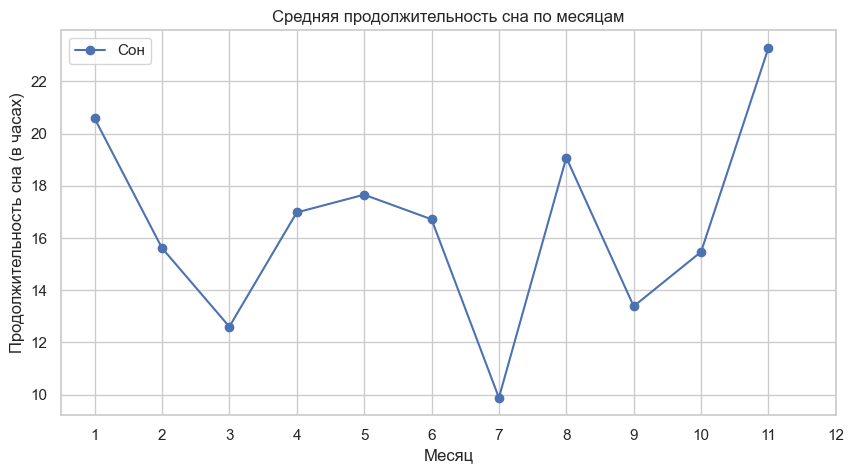

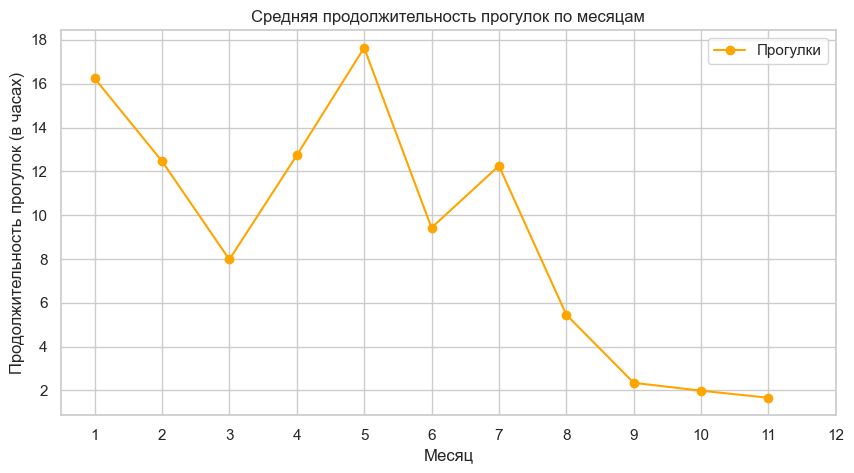

In [64]:
import matplotlib.pyplot as plt

# График для средней продолжительности сна по месяцам
plt.figure(figsize=(10, 5))
plt.plot(sleep_by_month.index, sleep_by_month.values, marker='o', label='Сон')
plt.title('Средняя продолжительность сна по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Продолжительность сна (в часах)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.show()

# График для средней продолжительности прогулок по месяцам
plt.figure(figsize=(10, 5))
plt.plot(walk_by_month.index, walk_by_month.values, marker='o', label='Прогулки', color='orange')
plt.title('Средняя продолжительность прогулок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Продолжительность прогулок (в часах)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.show()


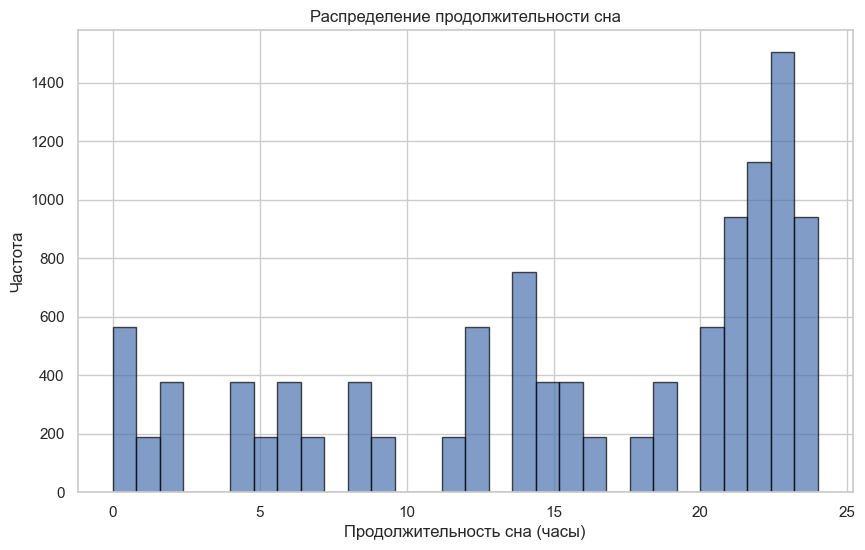

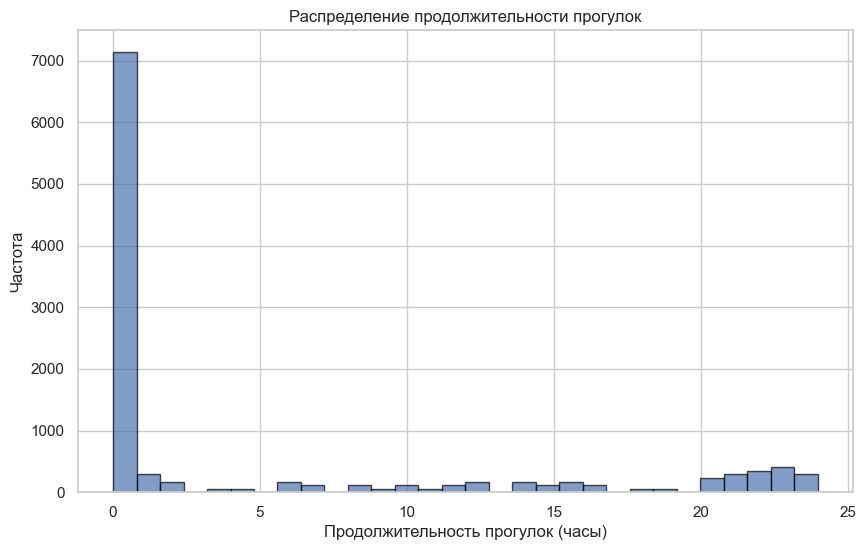

In [67]:
import matplotlib.pyplot as plt

# Гистограмма для продолжительности сна
plt.figure(figsize=(10, 6))
plt.hist(merged_df['sleep_duration'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Распределение продолжительности сна')
plt.xlabel('Продолжительность сна (часы)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Гистограмма для продолжительности прогулок
plt.figure(figsize=(10, 6))
plt.hist(merged_df['walk_duration'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Распределение продолжительности прогулок')
plt.xlabel('Продолжительность прогулок (часы)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


Статистика для продолжительности сна:
Среднее: 15.518539272030651
Медиана: 18.15361111111111
Стандартное отклонение: 7.572411308133055
Асимметрия (skewness): -0.7052870885201468

Статистика для продолжительности прогулок:
Среднее: 5.082949172576832
Медиана: 0.011944444444444445
Стандартное отклонение: 8.256753037630663
Асимметрия (skewness): 1.271855124571079


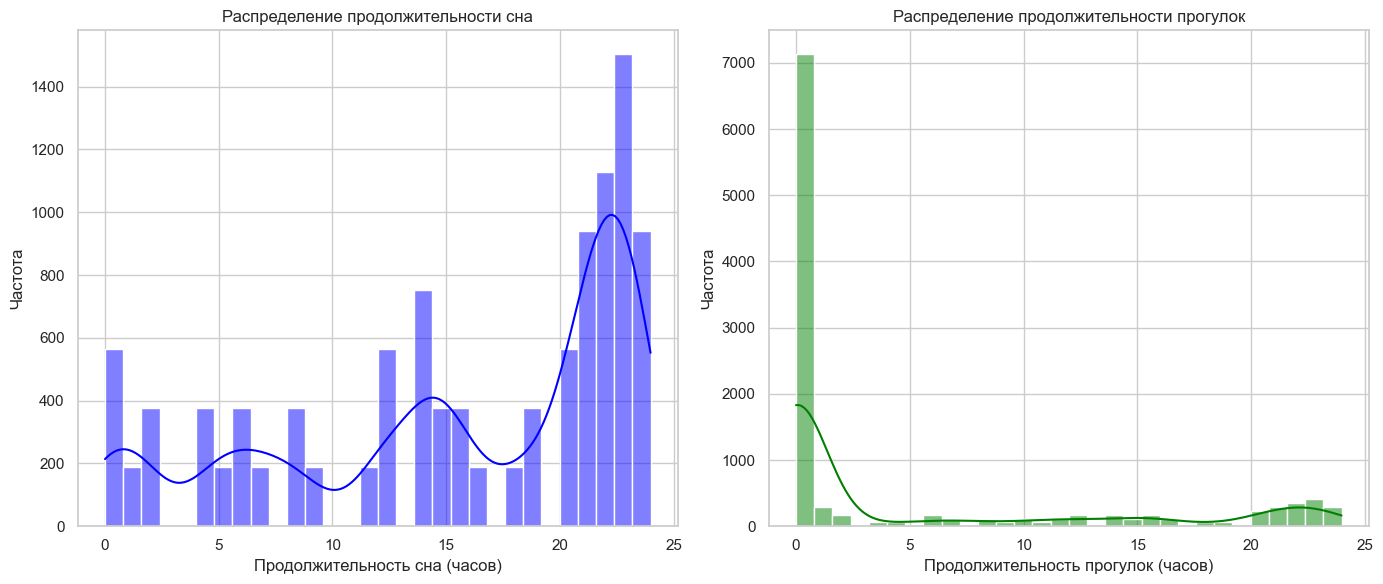

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Статистики для анализа распределения данных
sleep_mean = merged_df['sleep_duration'].mean()
sleep_median = merged_df['sleep_duration'].median()
sleep_std = merged_df['sleep_duration'].std()
sleep_skewness = merged_df['sleep_duration'].skew()

walk_mean = merged_df['walk_duration'].mean()
walk_median = merged_df['walk_duration'].median()
walk_std = merged_df['walk_duration'].std()
walk_skewness = merged_df['walk_duration'].skew()

print(f"Статистика для продолжительности сна:")
print(f"Среднее: {sleep_mean}")
print(f"Медиана: {sleep_median}")
print(f"Стандартное отклонение: {sleep_std}")
print(f"Асимметрия (skewness): {sleep_skewness}")

print(f"\nСтатистика для продолжительности прогулок:")
print(f"Среднее: {walk_mean}")
print(f"Медиана: {walk_median}")
print(f"Стандартное отклонение: {walk_std}")
print(f"Асимметрия (skewness): {walk_skewness}")

# Построение гистограмм для распределения данных
plt.figure(figsize=(14, 6))

# Гистограмма для продолжительности сна
plt.subplot(1, 2, 1)
sns.histplot(merged_df['sleep_duration'], kde=True, color='blue', bins=30)
plt.title('Распределение продолжительности сна')
plt.xlabel('Продолжительность сна (часов)')
plt.ylabel('Частота')

# Гистограмма для продолжительности прогулок
plt.subplot(1, 2, 2)
sns.histplot(merged_df['walk_duration'], kde=True, color='green', bins=30)
plt.title('Распределение продолжительности прогулок')
plt.xlabel('Продолжительность прогулок (часов)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()


Коэффициент корреляции Пирсона между продолжительностью сна и прогулок: -3.469446951953614e-18

Результаты линейной регрессии:
                            OLS Regression Results                            
Dep. Variable:          walk_duration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 5.122e-12
Date:                Tue, 24 Dec 2024   Prob (F-statistic):               1.00
Time:                        21:10:42   Log-Likelihood:                -38490.
No. Observations:               10904   AIC:                         7.698e+04
Df Residuals:                   10902   BIC:                         7.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]


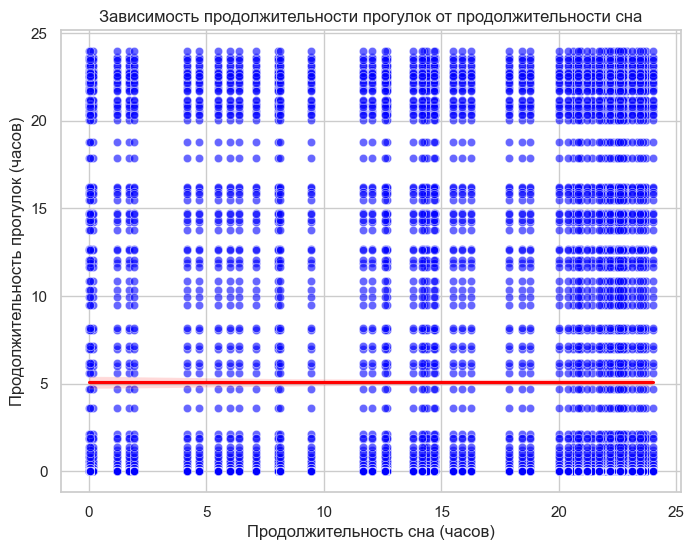

In [75]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# 1. Рассчитаем корреляцию Пирсона между продолжительностью сна и прогулок
correlation, _ = pearsonr(merged_df['sleep_duration'], merged_df['walk_duration'])
print(f"Коэффициент корреляции Пирсона между продолжительностью сна и прогулок: {correlation}")

# 2. Линейная регрессия: зависимость продолжительности прогулок от сна
X = merged_df['sleep_duration']  # независимая переменная (продолжительность сна)
y = merged_df['walk_duration']   # зависимая переменная (продолжительность прогулок)

# Добавляем константу для модели (перехват)
X_with_const = sm.add_constant(X)

# Строим модель линейной регрессии
model = sm.OLS(y, X_with_const).fit()

# Выводим результаты модели
print("\nРезультаты линейной регрессии:")
print(model.summary())

# 3. Визуализация данных: график рассеяния и линия регрессии
plt.figure(figsize=(8, 6))

# График рассеяния
sns.scatterplot(x=merged_df['sleep_duration'], y=merged_df['walk_duration'], color='blue', alpha=0.6)

# Добавление линии регрессии
sns.regplot(x=merged_df['sleep_duration'], y=merged_df['walk_duration'], scatter=False, color='red')

plt.title('Зависимость продолжительности прогулок от продолжительности сна')
plt.xlabel('Продолжительность сна (часов)')
plt.ylabel('Продолжительность прогулок (часов)')
plt.show()


Аномальные значения для продолжительности сна:
Empty DataFrame
Columns: [timestamp_sleep, sleep_duration]
Index: []

Аномальные значения для продолжительности прогулок:
Empty DataFrame
Columns: [timestamp_steps, walk_duration]
Index: []


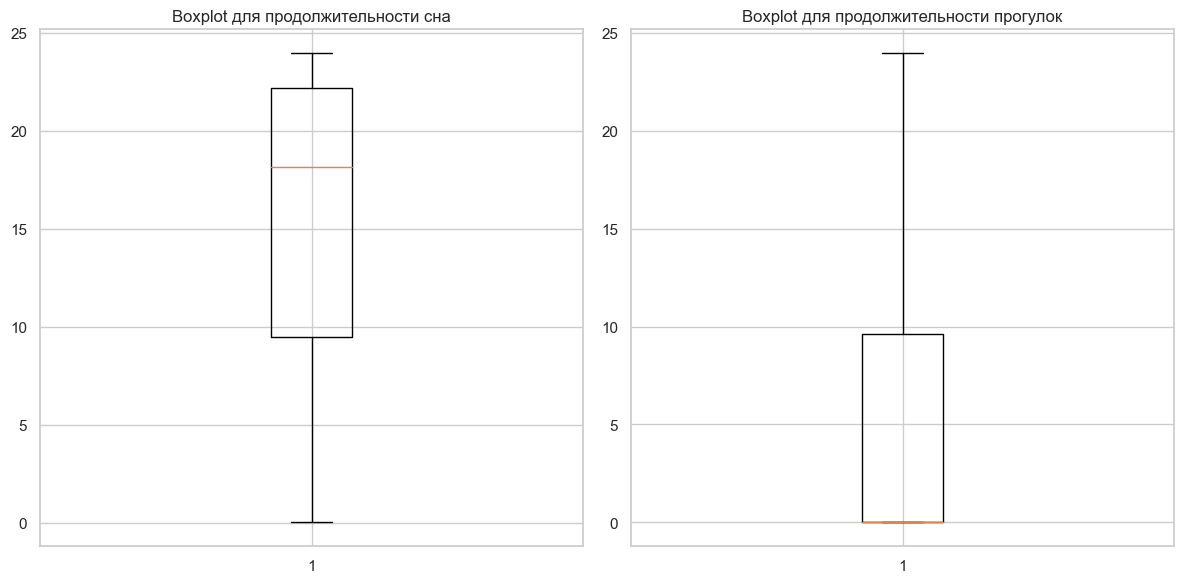

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Рассчитаем IQR для продолжительности сна и прогулок
Q1_sleep = merged_df['sleep_duration'].quantile(0.25)
Q3_sleep = merged_df['sleep_duration'].quantile(0.75)
IQR_sleep = Q3_sleep - Q1_sleep

Q1_walk = merged_df['walk_duration'].quantile(0.25)
Q3_walk = merged_df['walk_duration'].quantile(0.75)
IQR_walk = Q3_walk - Q1_walk

# Определим выбросы для сна и прогулок
sleep_outliers = merged_df[(merged_df['sleep_duration'] < (Q1_sleep - 1.5 * IQR_sleep)) |
                           (merged_df['sleep_duration'] > (Q3_sleep + 1.5 * IQR_sleep))]

walk_outliers = merged_df[(merged_df['walk_duration'] < (Q1_walk - 1.5 * IQR_walk)) |
                          (merged_df['walk_duration'] > (Q3_walk + 1.5 * IQR_walk))]

# Выводим аномалии
print("Аномальные значения для продолжительности сна:")
print(sleep_outliers[['timestamp_sleep', 'sleep_duration']])

print("\nАномальные значения для продолжительности прогулок:")
print(walk_outliers[['timestamp_steps', 'walk_duration']])

# Визуализируем данные и выбросы
plt.figure(figsize=(12, 6))

# График для сна
plt.subplot(1, 2, 1)
plt.boxplot(merged_df['sleep_duration'])
plt.title('Boxplot для продолжительности сна')

# График для прогулок
plt.subplot(1, 2, 2)
plt.boxplot(merged_df['walk_duration'])
plt.title('Boxplot для продолжительности прогулок')

plt.tight_layout()
plt.show()


In [77]:
# Используем множитель 1.0 вместо 1.5 для более чувствительного поиска выбросов
sleep_outliers = merged_df[(merged_df['sleep_duration'] < (Q1_sleep - 1.0 * IQR_sleep)) |
                           (merged_df['sleep_duration'] > (Q3_sleep + 1.0 * IQR_sleep))]

walk_outliers = merged_df[(merged_df['walk_duration'] < (Q1_walk - 1.0 * IQR_walk)) |
                          (merged_df['walk_duration'] > (Q3_walk + 1.0 * IQR_walk))]

# Выводим аномалии
print("Аномальные значения для продолжительности сна:")
print(sleep_outliers[['timestamp_sleep', 'sleep_duration']])

print("\nАномальные значения для продолжительности прогулок:")
print(walk_outliers[['timestamp_steps', 'walk_duration']])


Аномальные значения для продолжительности сна:
Empty DataFrame
Columns: [timestamp_sleep, sleep_duration]
Index: []

Аномальные значения для продолжительности прогулок:
          timestamp_steps  walk_duration
1116  2024-01-09 09:04:18      20.591389
1126  2024-02-01 05:51:00      21.125556
1133  2024-02-05 17:27:02      23.178611
1139  2024-02-12 09:58:46      20.974167
1147  2024-02-19 09:07:34      20.039722
...                   ...            ...
87820 2024-09-13 10:43:12      22.518611
87836 2024-10-01 11:19:49      21.175278
87838 2024-10-03 11:25:08      22.714167
87904 2024-11-03 20:15:55      22.574722
87914 2024-11-05 20:35:03      23.976944

[1566 rows x 2 columns]


In [78]:
# Рассчитаем среднее и стандартное отклонение для продолжительности сна и прогулок
sleep_mean = merged_df['sleep_duration'].mean()
sleep_std = merged_df['sleep_duration'].std()

walk_mean = merged_df['walk_duration'].mean()
walk_std = merged_df['walk_duration'].std()

# Определим выбросы, если значения выходят за пределы 2 стандартных отклонений
sleep_outliers_std = merged_df[(merged_df['sleep_duration'] < (sleep_mean - 2 * sleep_std)) |
                               (merged_df['sleep_duration'] > (sleep_mean + 2 * sleep_std))]

walk_outliers_std = merged_df[(merged_df['walk_duration'] < (walk_mean - 2 * walk_std)) |
                              (merged_df['walk_duration'] > (walk_mean + 2 * walk_std))]

# Выводим аномалии
print("Аномальные значения для продолжительности сна (по стандартному отклонению):")
print(sleep_outliers_std[['timestamp_sleep', 'sleep_duration']])

print("\nАномальные значения для продолжительности прогулок (по стандартному отклонению):")
print(walk_outliers_std[['timestamp_steps', 'walk_duration']])


Аномальные значения для продолжительности сна (по стандартному отклонению):
          timestamp_sleep  sleep_duration
44152 2024-06-19 10:45:25        0.008889
44157 2024-06-19 10:45:25        0.008889
44162 2024-06-19 10:45:25        0.008889
44164 2024-06-19 10:45:25        0.008889
44165 2024-06-19 10:45:25        0.008889
...                   ...             ...
68259 2024-09-06 06:32:47        0.044444
68260 2024-09-06 06:32:47        0.044444
68261 2024-09-06 06:32:47        0.044444
68262 2024-09-06 06:32:47        0.044444
68263 2024-09-06 06:32:47        0.044444

[564 rows x 2 columns]

Аномальные значения для продолжительности прогулок (по стандартному отклонению):
          timestamp_steps  walk_duration
1133  2024-02-05 17:27:02      23.178611
1150  2024-02-22 11:11:58      22.080833
1173  2024-03-15 15:27:24      22.904722
1199  2024-04-16 12:15:22      22.300556
1212  2024-05-06 10:39:52      23.666944
...                   ...            ...
87812 2024-09-10 08:38:21  

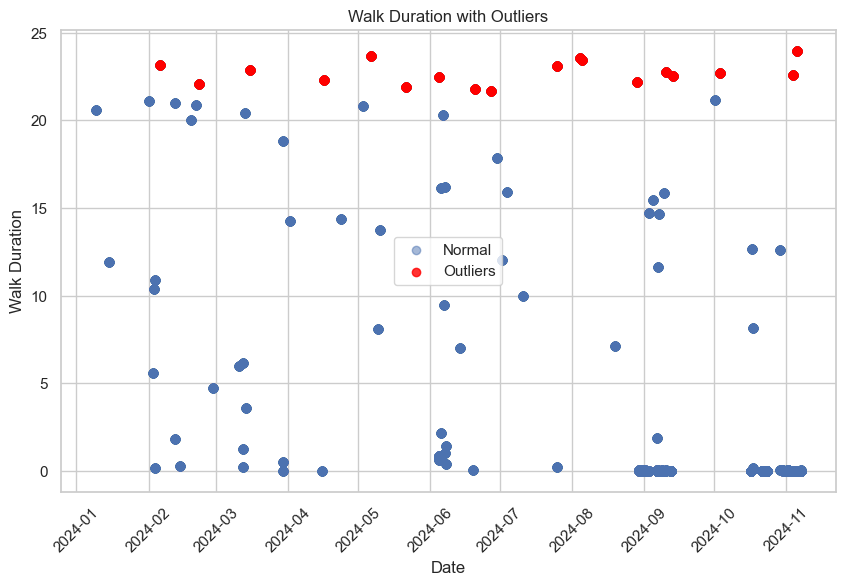

In [79]:
import matplotlib.pyplot as plt

# Визуализируем выбросы для продолжительности прогулок
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['timestamp_steps'], merged_df['walk_duration'], label='Normal', alpha=0.5)
plt.scatter(walk_outliers_std['timestamp_steps'], walk_outliers_std['walk_duration'], color='red', label='Outliers', alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Walk Duration')
plt.title('Walk Duration with Outliers')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [82]:
# Переводим продолжительность в минуты
merged_df['sleep_duration_minutes'] = merged_df['sleep_duration'] * 60
merged_df['walk_duration_minutes'] = merged_df['walk_duration'] * 60

# Перепроверим результат
print(merged_df[['sleep_duration', 'sleep_duration_minutes', 'walk_duration', 'walk_duration_minutes']].head())


      sleep_duration  sleep_duration_minutes  walk_duration  \
1116       20.584444             1235.066667      20.591389   
1121       20.584444             1235.066667      11.898611   
1126       20.584444             1235.066667      21.125556   
1128       20.584444             1235.066667       5.595278   
1129       20.584444             1235.066667      10.355833   

      walk_duration_minutes  
1116            1235.483333  
1121             713.916667  
1126            1267.533333  
1128             335.716667  
1129             621.350000  


In [83]:
# Определим категории длительности прогулок в минутах
bins = [0, 5, 10, float('inf')]  # в минутах
labels = ['Short', 'Medium', 'Long']

merged_df['walk_category'] = pd.cut(merged_df['walk_duration_minutes'], bins=bins, labels=labels)

# Рассчитаем среднюю продолжительность сна для каждой категории прогулок
sleep_by_walk_category = merged_df.groupby('walk_category')['sleep_duration_minutes'].mean()

print(sleep_by_walk_category)


walk_category
Short     931.112356
Medium    931.112356
Long      931.112356
Name: sleep_duration_minutes, dtype: float64


In [84]:
# Рассчитаем корреляцию Пирсона для минут
correlation = merged_df[['sleep_duration_minutes', 'walk_duration_minutes']].corr().iloc[0, 1]
print(f"Корреляция между длительностью прогулок и продолжительностью сна: {correlation}")


Корреляция между длительностью прогулок и продолжительностью сна: -5.3366738580807915e-18


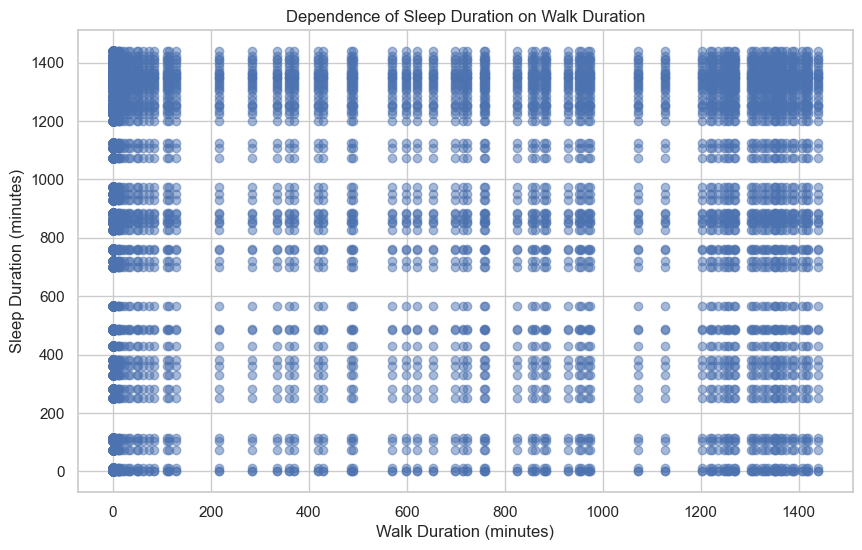

In [85]:
import matplotlib.pyplot as plt

# Построим график зависимости продолжительности сна от длительности прогулки в минутах
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['walk_duration_minutes'], merged_df['sleep_duration_minutes'], alpha=0.5)
plt.xlabel('Walk Duration (minutes)')
plt.ylabel('Sleep Duration (minutes)')
plt.title('Dependence of Sleep Duration on Walk Duration')
plt.show()
